273/273 [==============================] - 10s 35ms/step


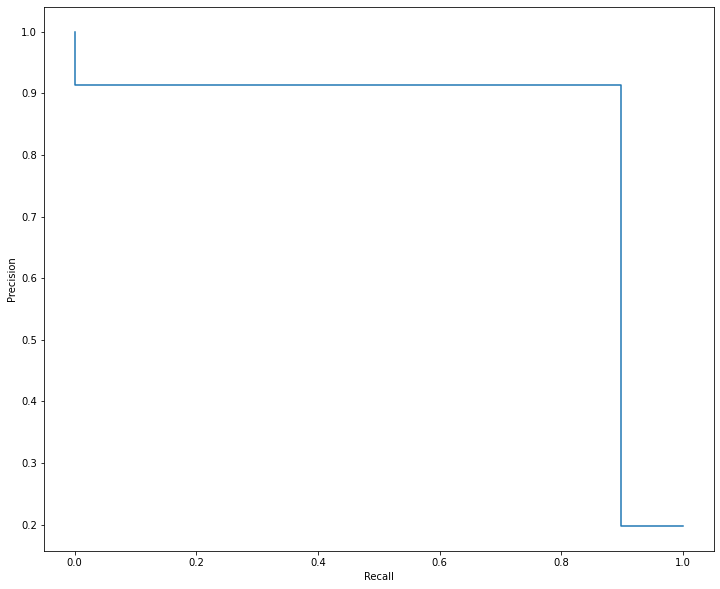

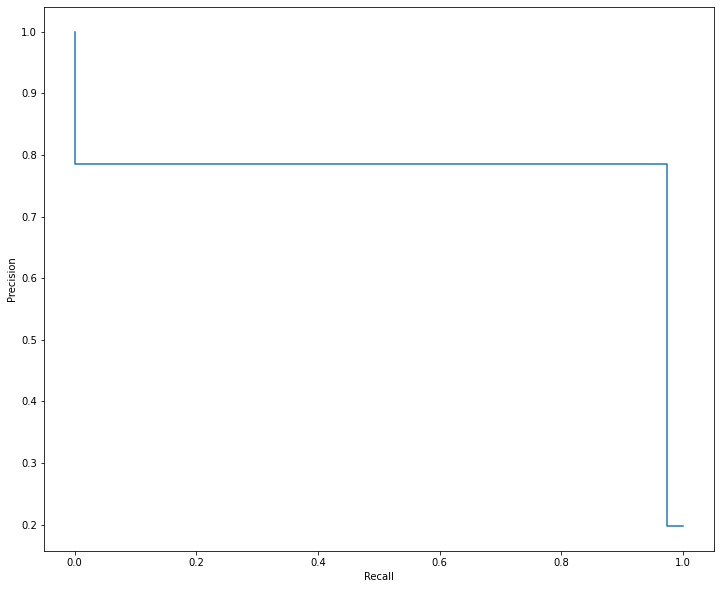

In [25]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import sklearn
#from tensorflow.keras.metrics import 
from sklearn.metrics import confusion_matrix,precision_recall_curve,PrecisionRecallDisplay,auc,RocCurveDisplay
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
labels=[]
features=[]
for address in glob.glob('C:\\Users\\Asus\\Desktop\\challange\\Training\\*\\*'):
    img=cv2.imread(address)
    img =cv2.resize(img,(32,32))
    img=img/255.0
    label=address.split('\\')
    labels.append(label[6])
    features.append(img)
features=np.array(features)
l_e=LabelEncoder()
int_encoding=l_e.fit_transform(labels)
one_hot_encoding=to_categorical(int_encoding,2)

X_train, X_test, y_train, y_test= train_test_split(features, one_hot_encoding, test_size=0.3)
base = load_model('baseline.h5')
im=load_model('Imbalanced_CNN.h5')
y_tst=np.argmax(y_test, axis=1)

y_Pred=base.predict(X_test)

test_base=np.argmax(base.predict(X_test),axis=1)

y_Pred_W=im.predict(X_test)
test_weighted=np.argmax(y_Pred_W, axis=1)
def myplot(y,y_pred):
    fpr, tpr, thresholds =precision_recall_curve(y, y_pred)
    precision, recall, _ = precision_recall_curve(y, y_pred)
    pr_display=PrecisionRecallDisplay(precision=precision, recall=recall)
    pr_display.plot()
    #pr_display.figure_.savefig(f'./out/PR_CURVE_FOR_ME.jpeg')
myplot(y_tst,test_base)
myplot(y_tst,test_weighted)






